In [1]:
# data imports
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
# clustering imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, MiniBatchKMeans
# classification imports
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# warnings imports
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import pandas as pd
import numpy as np

In [7]:
path = 'yelp_data/health_text_sentiment_full.csv'

In [8]:
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df = df[['stars','clean_text']]

In [9]:
df.head()

,stars,clean_text
0,1,please stay away place bad care imaginable sta...
1,5,husband patient dr byrne last year half last m...
2,4,dr byrne great doctor great bed side manner ex...
3,3,raise review dr bryne receptive daughter go an...
4,1,wish could give star bad office ever horrible ...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 2 columns):
stars         64006 non-null int64
clean_text    64006 non-null object
dtypes: int64(1), object(1)
memory usage: 1000.2+ KB


In [11]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
data = data.reset_index(drop=True)

In [12]:
data.head()

,stars,clean_text
0,1,please stay away place bad care imaginable sta...
1,5,husband patient dr byrne last year half last m...
2,1,wish could give star bad office ever horrible ...
3,1,go emergency room kidney stone attack emergenc...
4,5,dr byrne excellent doctor right skill include ...


In [14]:
data.stars.value_counts()

5    31726
1    21988
Name: stars, dtype: int64

## Vizualize

In [15]:
%%time
from sklearn.decomposition import PCA
pipeline = Pipeline([
('vect', CountVectorizer()),
('tfidf', TfidfTransformer()),
])
X = pipeline.fit_transform(data.clean_text).todense()
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)

CPU times: user 3min 54s, sys: 3min 52s, total: 7min 47s
Wall time: 4min 8s


In [16]:
frame = pd.DataFrame({'x':data2D[:,0], 'y':data2D[:,1],'stars':data.stars})

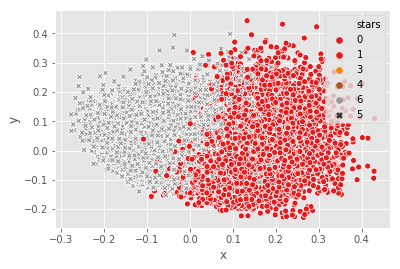

In [17]:
ax = sns.scatterplot(x="x", y="y", hue="stars",style='stars' ,data=frame,palette='Set1')

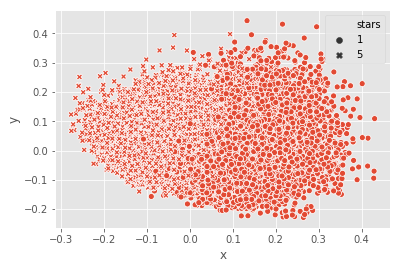

In [19]:
ax = sns.scatterplot(x="x", y="y",style='stars' ,data=frame)

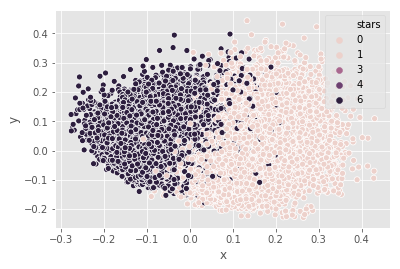

In [20]:
ax = sns.scatterplot(x="x", y="y",hue='stars' ,data=frame)

ValueError: x and y must be the same size

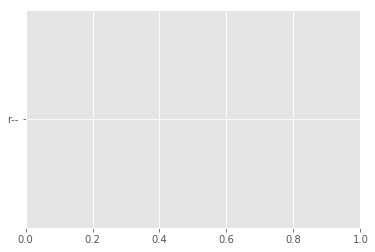

In [43]:
plt.scatter(data2D[:,0],'r--',data2D[:,1],'bs', alpha=0.5)
plt.show()

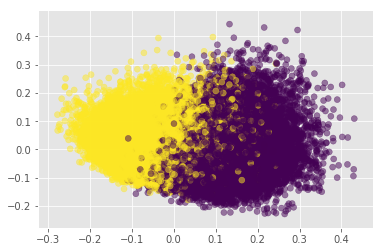

In [34]:
plt.scatter(data2D[:,0], data2D[:,1],c=data.stars, alpha=0.5)
plt.show()

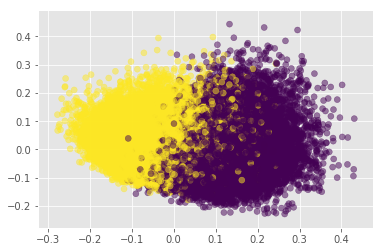

In [36]:
plt.scatter(frame.x,frame.y,c=frame.stars, alpha=0.5)
plt.show()